## **CISC873_Assignment0**

Mahsa Aghaeeaval (10177616)

# Problem Definition

Predicting product rating from Wish.com dataset. I will start by emplementing data exploration techniques to evalute the nature and significant of given features. I will pre-process the data to only contain valuable information used in model prediction. Several models will be hypertuned and compared based on their F-score (mean F-score). 

Steps:

1. Loading data / libraries

2. Data exploration

3. Data pre-processing

4. Normalizing / Scaling

5. Final data preparation

6. Modeling and performance evaluation

7. Feature evaluation

8. Findings

9. Predict rating for test_new.csv to be sumbitted on Kaggle

# Loading Data / Libraries

In [ ]:
# list of code resources used

In [ ]:
# libriaries used are loaded


from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from statistics import mean, stdev
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold,train_test_split,cross_val_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# grab dataset from google drive


drive.mount('/content/drive')

# loading the train_new.csv data as a pandas dataframe
df = pd.read_csv("/content/drive/My Drive/train_new.csv")


# loading the test_new.csv data as a pandas dataframe to be used later for kaggle prediction
df_test_for_kaggle = pd.read_csv("/content/drive/My Drive/test_new.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_test_id = pd.read_csv("/content/drive/My Drive/test_new.csv")
test_id=df_test_id['id']
print(test_id)

0       937
1       270
2       308
3       913
4       403
       ... 
474    1166
475    1416
476      63
477     626
478     196
Name: id, Length: 479, dtype: int64


# Data exploration

In [ ]:
# peak into data

# print first and last few rows of the dataset
print(df.head())
print(df.tail())

# print all column headers + type
print(df.info())

# checking for missing values for every feature
df.isnull().sum()

#NOTES: These statistics will show how the data is structured and what it cocntains and gives an idea how much 'fun' this is going to be

In [ ]:
# synonym features check

# heat correlation map to check to for synonym columsn (identical or almost identical faetures)
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', center = 0)
plt.show()

#NOTES: heat map correlation map can be used to identify near identical features (columns) if they are highly correlated

In [ ]:
# uni-value features chck

# check to for uni-value columns
def is_unique(s):
    a = s.to_numpy()
    return (a[0] == a).all()
# returns True if all values of a feature are the same
is_unique(df['currency_buyer']) # replace 'currency_buyer' with any feature you want to check

#NOTES: checking for features that have the same or mostly the same values for every row as they are not descriptive enough 

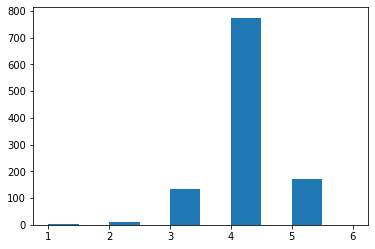

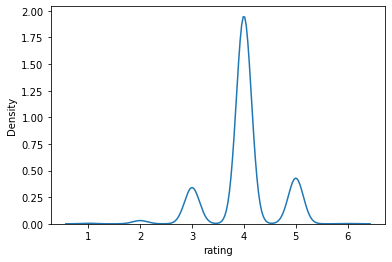

                               count     mean  ...      75%        max
price                         1094.0      8.0  ...     11.0       49.0
retail_price                  1094.0     24.0  ...     26.0      252.0
units_sold                    1094.0   4519.0  ...   5000.0   100000.0
uses_ad_boosts                1094.0      0.0  ...      1.0        1.0
rating                        1094.0      4.0  ...      4.0        6.0
rating_count                  1094.0    916.0  ...    846.0    20744.0
badges_count                  1094.0      0.0  ...      0.0        3.0
badge_local_product           1094.0      0.0  ...      0.0        1.0
badge_product_quality         1094.0      0.0  ...      0.0        1.0
badge_fast_shipping           1094.0      0.0  ...      0.0        1.0
product_variation_inventory   1094.0     33.0  ...     50.0       50.0
shipping_option_price         1094.0      2.0  ...      3.0       12.0
shipping_is_express           1094.0      0.0  ...      0.0        1.0
countr

In [ ]:
# feature distribution check

# checking the ditribution of features
select_feature = df['rating'] # replace 'rating' with any feature you want to check

feature_distribution_hist = plt.hist(select_feature) # dist using his
plt.show()

feature_distribution_kde = sns.kdeplot(select_feature) # dist using kde
plt.show()

# stats summary of features
print(round(df.describe().T))
print(df.median())


#NOTES: checking the distribution helps understand the feature in terms of its range. It will help see if the values are centered or scattered.
#NOTES: I am checking with 2 graphs (kde and histogram) since some feature are better represented using one
#NOTES: I included stats summary (mean) and median to mathematically check to see if any features are heavily + or - skewed

Overall stats:
8.320786106032902
23.712065813528337
----------------------
Stats for successful products:
8.544814814814815
24.404232804232805
----------------------
Stats for unsuccessful products:
6.899932885906042
19.322147651006713


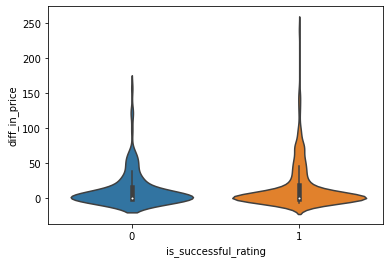

In [ ]:
# checking for significant relationships between features/features and features/target


# to see if there is a relantionship between features and target first I have determine what is considered a good rating and section off those products as is_successful_rating
# coverting to int since it was all .0 anyway
df.rating = df.rating.astype(int)
def is_successful_rating(rating):
    if rating >= 4:
        return 1
    else:
        return 0

# creating the column containing those only with ratings >= 4 and adds to df
df['is_successful_rating'] = df['rating'].apply(is_successful_rating)

# Check the difference between price and retail_price and see if there an association between those compared to successful vs unsucessful products
print('Overall stats:')
print(df['price'].mean())
print(df['retail_price'].mean())
print('----------------------')
print('Stats for successful products:')
print(df[df['is_successful_rating'] == 1]['price'].mean())
print(df[df['is_successful_rating'] == 1]['retail_price'].mean())
print('----------------------')
print('Stats for unsuccessful products:')
print(df[df['is_successful_rating'] == 0]['price'].mean())
print(df[df['is_successful_rating'] == 0]['retail_price'].mean())

# checking to see if difference in price between retail and price is associated with ratings
df['diff_in_price'] = round(df['retail_price'] - df['price'],2)
sns.violinplot(data=df, y='diff_in_price', x='is_successful_rating') # y (for sns plot) was changed to various features to see the results



# wanted to see if there is a relationship between using adboost and product rating
# print('Percent of products using ad boosts: ', df['uses_ad_boosts'].value_counts()[1] / len(df['uses_ad_boosts'])*100)
# sns.countplot(data=df, x='uses_ad_boosts', hue='is_successful_rating')



# Data cleaning and pre-processing


In [ ]:
# fixing some of the feature formatting for uniformity 

# fixing 'has_urgency_banner'
# has_urgency_banner needs to be converted binomial so here I am filling 0 for the missing values
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)
# has_urgency_banner needs to be converted binomial so here I am converting to int to match other binary columns
df.has_urgency_banner = df.has_urgency_banner.astype(int)

# fixing 'urgency_text'
# has_urgency_banner needs to be converted binomial so here I am filling 0 for the missing values
df['urgency_text'] = df['urgency_text'].fillna(0)
# convert string to int to change uantité limitée ! to NaN
df.urgency_text = pd.to_numeric(df.urgency_text, errors='coerce')
# Nan to 1 to create binary field
df['urgency_text'] = df['urgency_text'].fillna(1)
# has_urgency_banner needs to be converted binomial so here I am converting to int to match other binary columns
df.urgency_text = df.urgency_text.astype(int)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


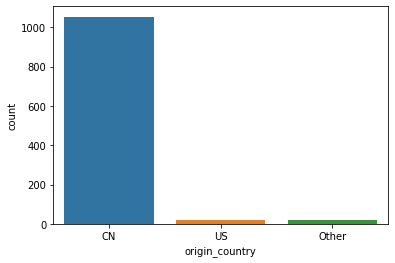

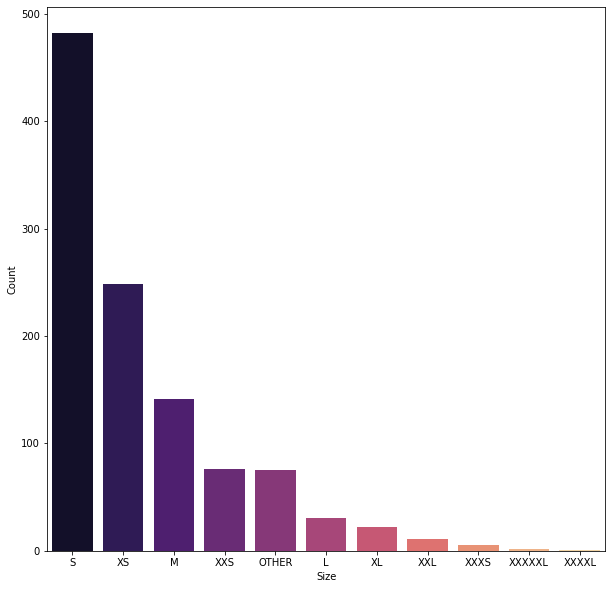

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


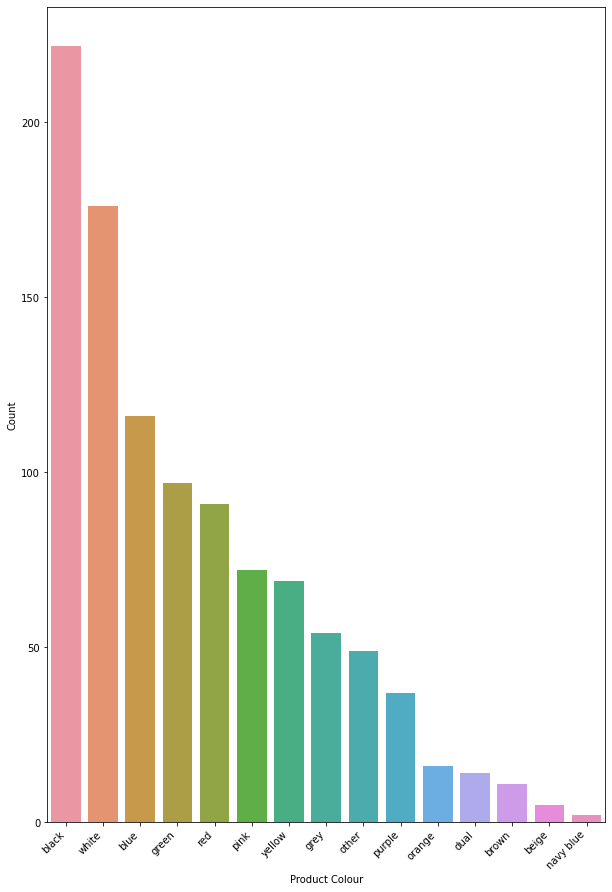

100       353
1000      280
5000      139
10000     125
20000      79
50         54
10         47
50000      12
100000      5
Name: units_sold, dtype: int64

In [ ]:
# unifying different variations of the same thing under one category e.g blue and Blue and light blue = blue

# Since this feature consists mainly of US and China we can combine the rest into others
df['origin_country'] = df['origin_country'].replace('VE', 'Other')
df['origin_country'] = df['origin_country'].replace('AT', 'Other')
df['origin_country'] = df['origin_country'].replace('SG', 'Other')
df['origin_country'] = df['origin_country'].replace('GB', 'Other')
df['origin_country'] = df['origin_country'].replace(np.nan, 'Other')
# visual check to see if it correctly categorized everything
sns.countplot('origin_country', data=df)



# Replacing different variations of sizes into one
df['product_variation_size_id'] = df['product_variation_size_id'].replace('S.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XS.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('M.', 'M')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-XS', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE XS', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size4XL', 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('size S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size M', 'M')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size -XXS', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE-XXS', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size S.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('s', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SizeL', 'L')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('5XL', 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('4XL', 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('3XL', 'XL')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('2XL', 'XL')

# list anything != name to OTHER to account for other variations
def pr_var(name):
    if name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL':
        return name
    else:
        return "OTHER"

# replace missing values with OTHER 
df['product_variation_size_id'] = df['product_variation_size_id'].replace(np.nan, 'OTHER')
# adding the new categories to df['feature']
df['product_variation_size_id'] = df['product_variation_size_id'].apply(pr_var)


# graph to look at size distribution to see if it correctly categorized everything
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = df['product_variation_size_id'].value_counts().index,
              palette="magma",
              data = df,
              ax = ax)
ax.set(xlabel='Size', ylabel='Count')
plt.show()



# Replacing different variations of colors into one and change missing values to OTHER

df['product_color'] = df['product_color'].replace('Black', 'black')
df['product_color'] = df['product_color'].replace('White', 'white')
df['product_color'] = df['product_color'].replace('navyblue', 'blue')
df['product_color'] = df['product_color'].replace('lightblue', 'blue')
df['product_color'] = df['product_color'].replace('skyblue', 'blue')
df['product_color'] = df['product_color'].replace('darkblue', 'blue')
df['product_color'] = df['product_color'].replace('navy', 'blue')
df['product_color'] = df['product_color'].replace('winered', 'red')
df['product_color'] = df['product_color'].replace('rosered', 'red')
df['product_color'] = df['product_color'].replace('rose', 'red')
df['product_color'] = df['product_color'].replace('orange-red', 'red')
df['product_color'] = df['product_color'].replace('lightpink', 'pink')
df['product_color'] = df['product_color'].replace('armygreen', 'green')
df['product_color'] = df['product_color'].replace('khaki', 'green')
df['product_color'] = df['product_color'].replace('lightgreen', 'green')
df['product_color'] = df['product_color'].replace('fluorescentgreen', 'green')
df['product_color'] = df['product_color'].replace('gray', 'grey')
df['product_color'] = df['product_color'].replace('coffee', 'brown')
df['product_color'] = df['product_color'].replace('multicolor', 'other')
df['product_color'] = df['product_color'].replace('floral', 'other')
df['product_color'] = df['product_color'].replace('leopard', 'other')
df['product_color'] = df['product_color'].replace('camouflage', 'other')
df['product_color'] = df['product_color'].replace('white & green', 'dual')
df['product_color'] = df['product_color'].replace('black & green', 'dual')
df['product_color'] = df['product_color'].replace('black & white', 'dual')
df['product_color'] = df['product_color'].replace('camouflage', 'other')
df['product_color'] = df['product_color'].replace(np.nan, 'other')

# graph to look at size distribution to see if it correctly categorized everything
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_color',
              data = df,
              order = df['product_color'].value_counts().iloc[:15].index,
              ax = ax)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()




# checking for distribution of units sold 
df['units_sold'].value_counts()

# we have some units less than 10 so we're going to group them
def below_ten(units_sold):
    if units_sold < 10:
        return 10
    else:
        return units_sold

df['units_sold'] = df['units_sold'].apply(below_ten)
# checking for distribution of units sold to see if it correctly categorized everything
df['units_sold'].value_counts()

In [ ]:
# checking for duplicates in df
df.duplicated().sum()

# removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# drop unneeded columns from dataset
df.drop(['currency_buyer', 'theme','crawl_month', 'shipping_option_name','inventory_total','merchant_name','merchant_title','merchant_info_subtitle','id','merchant_profile_picture','urgency_text','is_successful_rating','countries_shipped_to','product_color','product_variation_size_id','merchant_id','shipping_is_express','badge_local_product'], axis=1, inplace=True)


# NOTE: very dynamic column. features were added and removed to optimize accuracy

# Normalizing / scaling / encoding features

In [ ]:
# normalizing feature to prepare data for model prediction (for color)
df = pd.get_dummies(df, 
                    columns = ['product_color'],
                    prefix = 'color_',
                    drop_first = True)
# quick check to see if it worked
df.head()

In [ ]:
# normalizing feature to prepare data for model prediction (for size)
df = pd.get_dummies(df, 
                    columns = ['product_variation_size_id'],
                    prefix = 'size_',
                    drop_first = True)
# quick check to see if it worked
df.head()

In [ ]:
# normalizing feature to prepare data for model prediction (for origin_country)
df = pd.get_dummies(df, columns = ['origin_country'],
                    prefix = 'country_',drop_first = True)
# quick check to see if it worked
df.head()

KeyError: ignored

In [ ]:
# breaking up the tag column to see the number of tags per row. 
def tag_count(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    return len(prod_tags)
    
# replaced tags with tag_count from above to the df
df['tag_count'] = df['tags'].apply(tag_count)
df.drop(['tags'], axis=1, inplace=True)


In [ ]:
a = mean(df['rating_count'])
print(a)

915.5237659963437


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1093
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   int64  
 5   rating_count                  1094 non-null   int64  
 6   badges_count                  1094 non-null   int64  
 7   badge_product_quality         1094 non-null   int64  
 8   badge_fast_shipping           1094 non-null   int64  
 9   product_variation_inventory   1094 non-null   int64  
 10  shipping_option_price         1094 non-null   int64  
 11  has_urgency_banner            1094 non-null   int64  
 12  merchant_rating_count         1094 non-null   int64  
 13  mer

In [ ]:
# FEATURE ENGINEERING : comparing rating and rating count

def new_feature(rating_count):

  mean_count = mean(df['rating_count'])
  stdev_count = stdev(df['rating_count'])

  if int(rating_count) >= mean_count + stdev_count:
    return 2
  elif int(rating_count) >= mean_count - stdev_count:
    return 1
  else:
    return 0


df['new_feature_rating'] = df[['rating_count']].apply(new_feature, axis=1)




In [ ]:
print(df['new_feature_rating'].to_numpy()[0:1000])

In [ ]:
# FEATURE ENGINEERING : comparing rating and rating count

def new_feature(merchant_rating_count):

  mean_count = mean(df['merchant_rating_count'])
  stdev_count = stdev(df['merchant_rating_count'])

  if int(merchant_rating_count) >= mean_count + stdev_count:
    return 2
  elif int(merchant_rating_count) >= mean_count - stdev_count:
    return 1
  else:
    return 0


df['new_feature_merchant_rating'] = df[['merchant_rating_count']].apply(new_feature, axis=1)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1093
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   units_sold                    1094 non-null   int64  
 3   uses_ad_boosts                1094 non-null   int64  
 4   rating                        1094 non-null   int64  
 5   rating_count                  1094 non-null   int64  
 6   badges_count                  1094 non-null   int64  
 7   badge_product_quality         1094 non-null   int64  
 8   badge_fast_shipping           1094 non-null   int64  
 9   product_variation_inventory   1094 non-null   int64  
 10  shipping_option_price         1094 non-null   int64  
 11  has_urgency_banner            1094 non-null   int64  
 12  merchant_rating_count         1094 non-null   int64  
 13  mer

In [ ]:
# CAUTION: only run if you want to normalize values


min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
df_normalized=pd.DataFrame(x_scaled, columns=df.columns)


In [ ]:
# quick check before modeling
print(df)
print(df.info())
print(df_normalized)
print(df_normalized.info())

      price  retail_price  units_sold  ...  country__Other  country__US  tag_count
0      8.00             7       10000  ...               0            0         16
1      8.00             7        1000  ...               0            0         22
2      6.00            34         100  ...               0            0         23
3      4.67             4         100  ...               0            0         16
4      8.00            11        1000  ...               0            0         20
...     ...           ...         ...  ...             ...          ...        ...
1089   4.00             4       10000  ...               0            0         13
1090   5.00             5        1000  ...               0            0         18
1091   9.00            48        1000  ...               0            0         16
1092  11.00            10       10000  ...               0            0         20
1093   7.00             6        1000  ...               0            0         14

[10

# Final data preparation

In [ ]:
# training x and y without splitting to be used for cross validation if needed (FOR UN-NORMALIZED)
X_no_split = df.drop(['rating'], axis = 1)
y_no_split = df['rating']

In [ ]:
# training x and y without splitting to be used for cross validation if needed (FOR NORMALIZED)
X_no_split = df_normalized.drop(['rating'], axis = 1)
y_no_split = df['rating']

In [ ]:
# X/y train/test creation UN-NORMALIZED (only run this or NORMALIZED)

X_not_nor = df.drop(['rating'], axis = 1)
y_not_nor = df['rating']


X_train, X_test, y_train, y_test = train_test_split(X_not_nor, y_not_nor, 
                                                    test_size = 0.2, 
                                                    random_state=42)
# NOTE : uses df

In [ ]:
# X/y train/test creation for NORMALIZED (only run this or UN-NORMALIZED)


X_nor = df_normalized.drop(['rating'], axis = 1)
# we don't want a normalized target attribute since this is a classification problem
y_nor = df['rating']


X_train, X_test, y_train, y_test = train_test_split(X_nor, y_nor, 
                                                    test_size = 0.2)
# NOTE : uses df_normalized

In [ ]:
# over sampling data (only run if you want to over sample the data) !!!OPTIONAL!!!
## CAUTION: have to do some variable editing if you want to use oversampled data
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)


# NOTE : used for imbalanced dataset where you don't want to lose data to equally represent every target level (under sampling)
# NOTE : use 'X_res' and  'y_res' to train model if you want to use oversampled data

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(np.count_nonzero(y_res == 1))
print(np.count_nonzero(y_res == 2))
print(np.count_nonzero(y_res == 3))
print(np.count_nonzero(y_res == 4))
print(np.count_nonzero(y_res == 5))
print(np.count_nonzero(y_res == 6))

622
622
622
622
622
622


In [ ]:
print(np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_train == 2))
print(np.count_nonzero(y_train == 3))
print(np.count_nonzero(y_train == 4))
print(np.count_nonzero(y_train == 5))
print(np.count_nonzero(y_train == 6))

2
5
113
616
138
1


In [ ]:
# quick check before modeling
print(X_train)
print(y_train)

         price  retail_price  ...  country__US  tag_count
1027  0.062500         0.008  ...          0.0   0.212121
381   0.312500         0.048  ...          0.0   0.484848
881   0.208333         0.180  ...          0.0   0.060606
969   0.208333         0.032  ...          0.0   0.484848
464   0.270833         0.328  ...          0.0   0.333333
...        ...           ...  ...          ...        ...
21    0.229167         0.340  ...          0.0   0.242424
263   0.145833         0.020  ...          0.0   0.151515
355   0.125000         0.096  ...          0.0   0.181818
779   0.166667         0.028  ...          1.0   0.333333
204   0.041667         0.004  ...          0.0   0.363636

[875 rows x 18 columns]
1027    4
381     4
881     5
969     4
464     4
       ..
21      4
263     4
355     3
779     4
204     3
Name: rating, Length: 875, dtype: int64


# Modeling and evaluation

# Random models

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_XGBC = GradientBoostingClassifier()
classifier_XGBC.fit(X_train, y_train)
y_pred_XGBC = classifier_XGBC.predict(X_test)



f1_scores_XGBC=f1_score(y_test, y_pred_XGBC, average=None)
print(f1_scores_XGBC)
mean(f1_scores_XGBC)


[1.         0.66666667 0.48648649 0.88198758 0.72972973]


0.7529740921045269

Decision tree

In [ ]:
# Decision tree NOT cross validated

classifier_DTC = DecisionTreeClassifier()
classifier_DTC.fit(X_train, y_train)
y_pred_DTC = classifier_DTC.predict(X_test)



f1_scores_DTC=f1_score(y_test, y_pred_DTC, average=None)
print(f1_scores_DTC)
mean(f1_scores_DTC)

[1.         0.28571429 0.47058824 0.82666667 0.64102564]


0.6447989657401422

In [ ]:
# Decision tree CROSS VALIDATED

classifier_DTC = DecisionTreeClassifier()
kfold = KFold(n_splits=10)
y_pred_DTC = cross_val_predict(classifier_DTC, X_no_split, y_no_split, cv=kfold) #Cross validation on training set


f1_scores_DTC=f1_score(y_no_split, y_pred_DTC, average=None)
mean(f1_scores_DTC)

0.44466521610520415

In [ ]:
# Decision tree OVER SAMPLED

classifier_DTC = DecisionTreeClassifier(criterion='gini', splitter="random", max_depth=30,  max_features = None, max_leaf_nodes = None )
classifier_DTC.fit(X_res, y_res)
y_pred_DTC = classifier_DTC.predict(X_test)



f1_scores_DTC=f1_score(y_test, y_pred_DTC, average=None)
mean(f1_scores_DTC)

0.2911207335710647

Random forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_nor, y_nor, test_size = 0.2)


# Random forest NOT cross validated

classifier_RFC = RandomForestClassifier()
classifier_RFC.fit(X_train, y_train)
y_pred_RFC = classifier_RFC.predict(X_test)



f1_scores_RFC=f1_score(y_test, y_pred_RFC, average=None)
print(f1_scores_RFC)
mean(f1_scores_RFC)

[1.         0.66666667 0.35294118 0.88414634 0.76056338]


0.732863512976472

In [ ]:
# Random forest CROSS VALIDATED

classifier_RFC = RandomForestClassifier()
kfold = KFold(n_splits=10)
y_pred_RFC = cross_val_predict(classifier_RFC, X_no_split, y_no_split, cv=kfold) #Cross validation on training set


f1_scores_RFC=f1_score(y_no_split, y_pred_RFC, average=None)
mean(f1_scores_RFC)

0.5569580729643844

Adaboost

In [ ]:
# Adaboost NOT cross validated

classifier_ABC_RF = AdaBoostClassifier(RandomForestClassifier(), n_estimators= 30, learning_rate = 0.01) 
classifier_ABC_RF.fit(X_train, y_train)
y_pred_ABC_RF = classifier_ABC_RF.predict(X_test)


f1_scores_ABC=f1_score(y_test, y_pred_ABC_RF, average=None)
mean(f1_scores_ABC)

0.7273268968062895

In [ ]:
# Adaboost CROSS VALIDATED

classifier_ABC_RF = AdaBoostClassifier(RandomForestClassifier(),
                                       learning_rate = 0.01) 
kfold = KFold(n_splits=10)
y_pred_ABC_RF = cross_val_predict(classifier_ABC_RF, X_no_split, y_no_split, cv=kfold) #Cross validation on training set


f1_scores_ABC=f1_score(y_no_split, y_pred_ABC_RF, average=None)
mean(f1_scores_ABC)

0.5550076681863236

Neural net

In [ ]:
# MLP NOT cross validated

classifier_neural_MLP = MLPClassifier(random_state=42)
classifier_neural_MLP.fit(X_train, y_train)
y_pred_MLP = classifier_neural_MLP.predict(X_test)


f1_scores_MLP=f1_score(y_test, y_pred_MLP, average=None)
mean(f1_scores_MLP)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.2269997026464466

In [ ]:
# MLP CROSS VALIDATED

classifier_neural_MLP = MLPRegressor(random_state=42)
kfold = KFold(n_splits=10)
y_pred_MLP = cross_val_predict(classifier_neural_MLP, X_no_split, y_no_split, cv=kfold) #Cross validation on training set


f1_scores_MLP=f1_score(y_no_split, y_pred_MLP, average=None)
mean(f1_scores_MLP)

Ensemble learning

In [ ]:
# ensemble learning NOT cross validated

voting_cl = VotingClassifier(estimators = [('Random Forest',classifier_RFC), ('Ada Boost',classifier_ABC_RF)], voting = 'hard')
voting_cl.fit(X_train, y_train)
y_pred_vcl = voting_cl.predict(X_test)


f1_scores_Ensemble=f1_score(y_test, y_pred_vcl, average=None)
mean(f1_scores_Ensemble)

0.7399109037318663

In [ ]:
# ensemble learning CROSS VALIDATED

voting_cl = VotingClassifier(estimators = [('Decision Tree', classifier_DTC),
                                              ('Random Forest',classifier_RFC),
                                              ('Ada Boost',classifier_ABC_RF)], 
                                voting = 'hard')
kfold = KFold(n_splits=10)
y_pred_vcl = cross_val_predict(voting_cl, X_no_split, y_no_split, cv=kfold) #Cross validation on training set


f1_scores_Ensemble=f1_score(y_no_split, y_pred_vcl, average=None)
mean(f1_scores_Ensemble)

NameError: ignored

# Feature evaluation

In [ ]:
# determining which feature contribute most significantly to prediction



importances = classifier_RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier_RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_nor.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1, indices[f], X_nor.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 4 (rating_count) (0.182981)
2. feature 12 (merchant_rating) (0.135871)
3. feature 11 (merchant_rating_count) (0.124843)
4. feature 0 (price) (0.079496)
5. feature 1 (retail_price) (0.076236)
6. feature 17 (tag_count) (0.072905)
7. feature 14 (diff_in_price) (0.072249)
8. feature 2 (units_sold) (0.062142)
9. feature 8 (product_variation_inventory) (0.050085)
10. feature 9 (shipping_option_price) (0.037819)
11. feature 6 (badge_product_quality) (0.028629)
12. feature 5 (badges_count) (0.021484)
13. feature 10 (has_urgency_banner) (0.018654)
14. feature 3 (uses_ad_boosts) (0.017830)
15. feature 13 (merchant_has_profile_picture) (0.008844)
16. feature 7 (badge_fast_shipping) (0.004895)
17. feature 15 (country__Other) (0.002853)
18. feature 16 (country__US) (0.002185)


# Predict rating for test_new.csv to be sumbitted on Kaggle

In [ ]:
df_test_for_kaggle

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,XS,5,Livraison standard,2,0,139,50,NaN,NaN,CN,liyang163,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,XS,50,Livraison standard,2,0,31,50,NaN,NaN,CN,singing the song,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,XS,20,Livraison standard,2,0,41,50,NaN,NaN,CN,Surper boutique,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,M,50,Livraison standard,5,0,42,50,NaN,NaN,CN,postonny,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,M,50,Livraison standard,3,0,38,50,NaN,NaN,CN,fashionforgirls,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,EUR,100,1,27,0,0,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,M,50,Livraison standard,4,0,35,50,NaN,NaN,VE,HERNADEZYELI,hernadezyeli,70 % avis positifs (572 notes),572,3.367133,5dc818ca030a154e48a3a8af,0,NaN,summer,2020-08,1166
475,6.00,17,EUR,5000,1,817,0,0,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,XXS,1,Livraison standard,2,0,41,50,NaN,NaN,CN,First Crush,firstcrush,"87 % avis positifs (50,864 notes)",50864,4.079644,587f85cbb8038f4cb049c56c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1416
476,4.83,51,EUR,50,1,1,0,0,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,XS,3,Livraison standard,1,0,39,50,1.0,Quantité limitée !,VE,saulstore,saulstore,85 % avis positifs (57 notes),57,3.824561,5e3c5fbfe217d492138970c1,0,NaN,summer,2020-08,63
477,3.00,3,EUR,100,1,8,0,0,0,0,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Ind...",black,34,3,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,lkwelyly,hey1827,"87 % avis positifs (1,086 notes)",1086,4.056169,5c6d6c28619caa1d94891d06,0,NaN,summer,2020-08,626


In [ ]:
# peak into data

# print first and last few rows of the dataset
print(df_test_for_kaggle.head())
print(df_test_for_kaggle.tail())

# print all column headers + type
print(df_test_for_kaggle.info())

# checking for missing values for every feature
df_test_for_kaggle.isnull().sum()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


100       156
1000      125
5000       78
10000      52
20000      24
50         22
10         16
50000       5
100000      1
Name: units_sold, dtype: int64

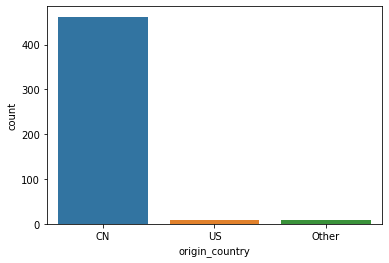

In [ ]:
# fixing some of the feature formatting for uniformity 

# fixing 'has_urgency_banner'
# has_urgency_banner needs to be converted binomial so here I am filling 0 for the missing values
df_test_for_kaggle['has_urgency_banner'] = df_test_for_kaggle['has_urgency_banner'].fillna(0)
# has_urgency_banner needs to be converted binomial so here I am converting to int to match other binary columns
df_test_for_kaggle.has_urgency_banner = df_test_for_kaggle.has_urgency_banner.astype(int)

# fixing 'urgency_text'
# has_urgency_banner needs to be converted binomial so here I am filling 0 for the missing values
df_test_for_kaggle['urgency_text'] = df_test_for_kaggle['urgency_text'].fillna(0)
# convert string to int to change uantité limitée ! to NaN
df_test_for_kaggle.urgency_text = pd.to_numeric(df_test_for_kaggle.urgency_text, errors='coerce')
# Nan to 1 to create binary field
df_test_for_kaggle['urgency_text'] = df_test_for_kaggle['urgency_text'].fillna(1)
# has_urgency_banner needs to be converted binomial so here I am converting to int to match other binary columns
df_test_for_kaggle.urgency_text = df_test_for_kaggle.urgency_text.astype(int)

# Since this feature consists mainly of US and China we can combine the rest into others
df_test_for_kaggle['origin_country'] = df_test_for_kaggle['origin_country'].replace('VE', 'Other')
df_test_for_kaggle['origin_country'] = df_test_for_kaggle['origin_country'].replace('AT', 'Other')
df_test_for_kaggle['origin_country'] = df_test_for_kaggle['origin_country'].replace('SG', 'Other')
df_test_for_kaggle['origin_country'] = df_test_for_kaggle['origin_country'].replace('GB', 'Other')
df_test_for_kaggle['origin_country'] = df_test_for_kaggle['origin_country'].replace(np.nan, 'Other')
# visual check to see if it correctly categorized everything
sns.countplot('origin_country', data=df_test_for_kaggle)

def below_ten(units_sold):
    if units_sold < 10:
        return 10
    else:
        return units_sold

df_test_for_kaggle['units_sold'] = df_test_for_kaggle['units_sold'].apply(below_ten)
# checking for distribution of units sold to see if it correctly categorized everything
df_test_for_kaggle['units_sold'].value_counts()

In [ ]:
# drop unneeded columns from dataset
df_test_for_kaggle.drop(['currency_buyer', 'theme','crawl_month', 'shipping_option_name','inventory_total','merchant_name','merchant_title','merchant_info_subtitle','id','merchant_profile_picture','urgency_text','countries_shipped_to','product_color','product_variation_size_id','merchant_id','shipping_is_express','badge_local_product'], axis=1, inplace=True)



In [ ]:
# normalizing feature to prepare data for model prediction (for origin_country)
df_test_for_kaggle = pd.get_dummies(df_test_for_kaggle, columns = ['origin_country'],
                    prefix = 'country_',drop_first = True)
# quick check to see if it worked
df_test_for_kaggle.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_price,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,country__Other,country__US
0,5.75,5,10,1,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",5,2,0,3,2.333333,0,0,0
1,7.00,7,5000,0,579,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",50,2,0,4213,4.058391,0,0,0
2,5.00,16,1000,1,62,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",20,2,0,10501,4.029235,0,0,0
3,18.00,27,5000,1,1903,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",50,5,0,15855,4.052917,0,0,0
4,12.00,81,20000,0,1799,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",50,3,0,151914,4.127921,0,0,0


In [ ]:
# breaking up the tag column to see the number of tags per row. 
def tag_count(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    return len(prod_tags)
    
# replaced tags with tag_count from above to the df
df_test_for_kaggle['tag_count'] = df_test_for_kaggle['tags'].apply(tag_count)
df_test_for_kaggle.drop(['tags'], axis=1, inplace=True)

In [ ]:
# checking to see if difference in price between retail and price is associated with ratings
df_test_for_kaggle['diff_in_price'] = round(df_test_for_kaggle['retail_price'] - df_test_for_kaggle['price'],2)


In [ ]:
# CAUTION: only run if you want to normalize values


min_max_scaler_kaggle = preprocessing.MinMaxScaler()
x_scaled_kaggle = min_max_scaler_kaggle.fit_transform(df_test_for_kaggle)
df_normalized_kaggle=pd.DataFrame(x_scaled_kaggle, columns=df_test_for_kaggle.columns)

In [ ]:
df_normalized_kaggle

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,country__Other,country__US,tag_count,diff_in_price
0,0.250000,0.023952,0.000000,1.0,0.000000,0.0,0.0,0.0,0.081633,0.166667,0.0,0.000004,0.000000,0.0,0.0,0.0,0.40,0.014063
1,0.315789,0.035928,0.049905,0.0,0.032202,0.0,0.0,0.0,1.000000,0.166667,0.0,0.005016,0.646897,0.0,0.0,0.0,0.52,0.018750
2,0.210526,0.089820,0.009901,1.0,0.003448,0.0,0.0,0.0,0.387755,0.166667,0.0,0.012503,0.635963,0.0,0.0,0.0,0.44,0.087500
3,0.894737,0.155689,0.049905,1.0,0.105840,0.0,0.0,0.0,1.000000,0.666667,0.0,0.018878,0.644844,0.0,0.0,0.0,0.36,0.075000
4,0.578947,0.479042,0.199920,0.0,0.100056,0.0,0.0,0.0,1.000000,0.333333,0.0,0.180875,0.672970,0.0,0.0,0.0,0.16,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.789474,0.077844,0.000900,1.0,0.001502,0.0,0.0,0.0,1.000000,0.500000,0.0,0.000681,0.387675,0.0,1.0,0.0,0.40,0.006250
475,0.263158,0.095808,0.049905,1.0,0.045439,0.0,0.0,0.0,0.000000,0.166667,0.0,0.060561,0.654866,1.0,0.0,0.0,0.28,0.087500
476,0.201579,0.299401,0.000400,1.0,0.000056,0.0,0.0,0.0,0.040816,0.000000,1.0,0.000068,0.559211,0.0,1.0,0.0,0.32,0.307312
477,0.105263,0.011976,0.000900,1.0,0.000445,0.0,0.0,0.0,0.040816,0.000000,1.0,0.001293,0.646064,0.0,0.0,0.0,0.32,0.018750


In [ ]:
print(df_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   float64
 2   units_sold                    1094 non-null   float64
 3   uses_ad_boosts                1094 non-null   float64
 4   rating                        1094 non-null   float64
 5   rating_count                  1094 non-null   float64
 6   badges_count                  1094 non-null   float64
 7   badge_product_quality         1094 non-null   float64
 8   badge_fast_shipping           1094 non-null   float64
 9   product_variation_inventory   1094 non-null   float64
 10  shipping_option_price         1094 non-null   float64
 11  has_urgency_banner            1094 non-null   float64
 12  merchant_rating_count         1094 non-null   float64
 13  mer

In [ ]:
print(df_normalized_kaggle.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    float64
 2   units_sold                    479 non-null    float64
 3   uses_ad_boosts                479 non-null    float64
 4   rating_count                  479 non-null    float64
 5   badges_count                  479 non-null    float64
 6   badge_product_quality         479 non-null    float64
 7   badge_fast_shipping           479 non-null    float64
 8   product_variation_inventory   479 non-null    float64
 9   shipping_option_price         479 non-null    float64
 10  has_urgency_banner            479 non-null    float64
 11  merchant_rating_count         479 non-null    float64
 12  merchant_rating               479 non-null    float64
 13  merch

In [ ]:
X_train_kaggle = df_normalized.drop(['rating'], axis = 1)
y_train_kaggle = df['rating']
X_test_kaggle = df_normalized_kaggle


In [ ]:
def gen_kaggle_submission(id,y_pred,filename="test_out.csv"):
  with open("/content/drive/My Drive/"+filename,"w") as file_out:
    file_out.write("id,rating\n")
    for i in zip(id,y_pred):
      str_out = f"{i[0]},{i[1]:.1f}\n"
      file_out.write(str_out)

In [ ]:
y_pred_vc_kaggle=voting_cl.predict(X_test_kaggle)


In [ ]:
y_pred_vc1_kaggle=voting_cl.predict(X_test_kaggle)

In [ ]:
y_pred_vc2_kaggle=voting_cl.predict(X_test_kaggle)

In [ ]:
y_pred_rf2_kaggle=classifier_RFC.predict(X_test_kaggle)

In [ ]:
y_pred_vc3_kaggle=voting_cl.predict(X_test_kaggle)

In [ ]:
voting_cl.fit(X_train_kaggle,y_train_kaggle)
y_pred_vc5_kaggle=voting_cl.predict(X_test_kaggle)

In [ ]:



voting_cl.fit(X_train_kaggle,y_train_kaggle)
y_pred_kaggle=voting_cl.predict(X_test_kaggle)
gen_kaggle_submission(test_id, y_pred_kaggle,"vc.6_out.csv")

voting_cl.fit(X_train_kaggle,y_train_kaggle)
y_pred_kaggle=voting_cl.predict(X_test_kaggle)
gen_kaggle_submission(test_id, y_pred_kaggle,"vc.7_out.csv")

voting_cl.fit(X_train_kaggle,y_train_kaggle)
y_pred_kaggle=voting_cl.predict(X_test_kaggle)
gen_kaggle_submission(test_id, y_pred_kaggle,"vc.8_out.csv")

voting_cl.fit(X_train_kaggle,y_train_kaggle)
y_pred_kaggle=voting_cl.predict(X_test_kaggle)
gen_kaggle_submission(test_id, y_pred_kaggle,"vc.9_out.csv")

voting_cl.fit(X_train_kaggle,y_train_kaggle)
y_pred_kaggle=voting_cl.predict(X_test_kaggle)
gen_kaggle_submission(test_id, y_pred_kaggle,"vc.10_out.csv")


In [ ]:
# print("Generating Model output 1(rf)")
# gen_kaggle_submission(test_id, y_pred_RFC_kaggle,"rf.1_out.csv")

# print("Generating Model output 2 (voting classifier)")
# gen_kaggle_submission(test_id, y_pred_vc_kaggle,"vc.1_out.csv")

# print("Generating Model output 3 (voting classifier 2)")
# gen_kaggle_submission(test_id, y_pred_vc_kaggle,"vc.2_out.csv")

# print("Generating Model output 4 (voting classifier 2)")
# gen_kaggle_submission(test_id, y_pred_vc2_kaggle,"vc.3_out.csv")

# print("Generating Model output 5 (random forest 2)")
# gen_kaggle_submission(test_id, y_pred_rf2_kaggle,"rf.2_out.csv")

#print("Generating Model output 6 (voting classifier 3)")
#gen_kaggle_submission(test_id, y_pred_vc3_kaggle,"vc.3_out.csv")

print("Generating Model output 7 (voting classifier 4)")
gen_kaggle_submission(test_id, y_pred_vc5_kaggle,"vc.5_out.csv")

Generating Model output 7 (voting classifier 4)


In [ ]:
!diff "/content/drive/My Drive/vc.3_out.csv" "/content/drive/My Drive/vc.3_out-new.csv"

62c62
< 911,4.0
---
> 911,5.0
193c193
< 727,4.0
---
> 727,3.0
331c331
< 736,4.0
---
> 736,5.0
368c368
< 1115,4.0
---
> 1115,3.0
397c397
< 1359,4.0
---
> 1359,5.0
